In [9]:
import pandas as pd
auto_price=pd.read_csv('Automobile price data _Raw_.csv')
print(auto_price.head(10))
print('改為網頁輸出，較方便查看內容')
auto_price.to_html('auto1.html')

   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   
5          2                 ?         audi       gas        std          two   
6          1               158         audi       gas        std         four   
7          1                 ?         audi       gas        std         four   
8          1               158         audi       gas      turbo         four   
9          0                 ?         audi       gas      turbo          two   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd    

In [10]:
print('了解欄位名稱，容易有誤判風險')
print(auto_price.columns)
print('儲存欄位名稱')
cols=auto_price.columns
auto_price.columns=[str.replace('-','_') for str in cols] #將欄位名稱的-改為_
print('修改完成')
print(auto_price.columns)
print('改為網頁輸出，較方便查看內容')
auto_price.to_html('auto2.html')

了解欄位名稱，容易有誤判風險
Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')
儲存欄位名稱
修改完成
Index(['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration',
       'num_of_doors', 'body_style', 'drive_wheels', 'engine_location',
       'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'num_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price'],
      dtype='object')
改為網頁輸出，較方便查看內容


In [11]:
print('查找遺失值1')
print(auto_price.isnull().any()) #查看每個欄位是否有遺失值
print('查看每個欄位的資料型態')
print('主要目的是要查看那些欄位是object')
print(auto_price.dtypes)
for i in auto_price.columns:
    if auto_price[i].dtype==object:
        print(i)
print('price欄位內容應該是數值，怎會變成object?')
for i in auto_price['price']:
    try:
        j = float(i)
    except:
        print(i)
#print(i)


查找遺失值1
symboling            False
normalized_losses    False
make                 False
fuel_type            False
aspiration           False
num_of_doors         False
body_style           False
drive_wheels         False
engine_location      False
wheel_base           False
length               False
width                False
height               False
curb_weight          False
engine_type          False
num_of_cylinders     False
engine_size          False
fuel_system          False
bore                 False
stroke               False
compression_ratio    False
horsepower           False
peak_rpm             False
city_mpg             False
highway_mpg          False
price                False
dtype: bool
查看每個欄位的資料型態
主要目的是要查看那些欄位是object
symboling              int64
normalized_losses     object
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location

In [12]:
from enum import auto #自動編號
print('查找遺失值1')
print(auto_price.isnull().sum())#計算遺失值數量
print('查找遺失值1a')
print(auto_price.isnull().any())#只要有遺失值就會顯示True
print('查看每個欄位的資料型態')
print('主要目的查看那些欄位是object，object代表文字型態')
print(auto_price.dtypes) #全部欄位的資料型態
print('查詢object型態的欄位')
for i in auto_price.columns:
  if auto_price[i].dtypes=='object':
    print(i)
print('發現到很多欄位內容應該是數值但卻顯示object')
print('price為什麼是object?我們想要知道price欄位內有那些文字')
for i in auto_price['price']:
  try:
    j=float(i)
  except:
    print(i)

查找遺失值1
symboling            0
normalized_losses    0
make                 0
fuel_type            0
aspiration           0
num_of_doors         0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64
查找遺失值1a
symboling            False
normalized_losses    False
make                 False
fuel_type            False
aspiration           False
num_of_doors         False
body_style           False
drive_wheels         False
engine_location      False
wheel_base           False
length               False
width                False
height               False
curb_weight          Fa

1.先檢驗資料中是否有遺失值。
2.如果沒有遺失值，代表可能是文字或數字取代遺失值。
3.先從文字型態資料著手，確認欄位的資料型態
4.屬於object型態的欄位，是否有純數值資料，例如price
人工方式檢驗，請先確認欄位儲存那些資料再作檢驗
5.若確認純數值資料欄位被判定是object，代表內容有文字資料
請把文字資料找出來，基本上就可以判斷這個文字資料是遺失值
例如 「?」

In [13]:
print('處理遺失值?之前得先確認有哪些欄位的這個資料數量有多少')
list1=[]
for col in auto_price: 
  for field1 in auto_price[col]:  #col是欄位名稱 field1是欄位內的每個資料
    if field1=='?':
      list1.append(col)
print(list1)
print(len(list1))
print('59個屬於哪些欄位')
list2=list(set(list1)) #利用set去除重複值
print(list2)
print(len(list2))
print('這7個欄位內有多少個?資料')
for i in list2:
  print('欄位名稱:',i,'?的數量:',list1.count(i)) #count計算list1內i的數量

處理遺失值?之前得先確認有哪些欄位的這個資料數量有多少
['normalized_losses', 'normalized_losses', 'normalized_losses', 'normalized_losses', 'normalized_losses', 'normalized_losses', 'normalized_losses', 'normalized_losses', 'normalized_losses', 'normalized_losses', 'normalized_losses', 'normalized_losses', 'normalized_losses', 'normalized_losses', 'normalized_losses', 'normalized_losses', 'normalized_losses', 'normalized_losses', 'normalized_losses', 'normalized_losses', 'normalized_losses', 'normalized_losses', 'normalized_losses', 'normalized_losses', 'normalized_losses', 'normalized_losses', 'normalized_losses', 'normalized_losses', 'normalized_losses', 'normalized_losses', 'normalized_losses', 'normalized_losses', 'normalized_losses', 'normalized_losses', 'normalized_losses', 'normalized_losses', 'normalized_losses', 'normalized_losses', 'normalized_losses', 'normalized_losses', 'normalized_losses', 'num_of_doors', 'num_of_doors', 'bore', 'bore', 'bore', 'bore', 'stroke', 'stroke', 'stroke', 'stroke', 'horse

In [14]:
import numpy as np
print('遺失值處理3')
print('將?轉換為NaN')
for column in list2:
  print(column)
  auto_price.loc[auto_price[column]=='?',column]=np.nan #將?轉換為NaN
print('轉換之後儲存資料')
auto_price.to_html('auto3.html')
auto_price.to_csv('auto3.csv')
print('查找遺失值3')
print(auto_price.isnull().sum())#計算遺失值數量
print('查找遺失值3a')
print(auto_price.isnull().any())#只要有遺失值就會顯示True
print('查看每個欄位的資料型態')
print('主要目的查看那些欄位是object，object代表文字型態')
print(auto_price.dtypes) #全部欄位的資料型態
print('查詢object型態的欄位')
for i in auto_price.columns:
  if auto_price[i].dtypes=='object':
    print(i)
print('發現到很多欄位內容應該是數值但卻顯示object')
print('price為什麼是object?我們想要知道price欄位內有那些文字')
for i in auto_price['price']:
  try:
    j=float(i)
  except:
    print(i)
print('再一次顯示資料型態')
print(auto_price.dtypes) #全部欄位的資料型態

遺失值處理3
將?轉換為NaN
horsepower
stroke
price
normalized_losses
bore
num_of_doors
peak_rpm
轉換之後儲存資料
查找遺失值3
symboling             0
normalized_losses    41
make                  0
fuel_type             0
aspiration            0
num_of_doors          2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_of_cylinders      0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64
查找遺失值3a
symboling            False
normalized_losses     True
make                 False
fuel_type            False
aspiration           False
num_of_doors          True
body_style           False
drive_wheels         False
engine_location      False
wheel_base 

In [15]:
print(auto_price.shape) #顯示資料筆數與欄位數
print('normalized_losses遺失值數量過高，且這個欄位較無訓練的必要性')
try:
    auto_price.drop(['normalized_losses'],axis=1,inplace=True) #刪除欄位
except:
    pass
print('刪除之後：',auto_price.shape)
print('其他遺失值')
print('查找遺失值4')
print(auto_price.isnull().sum())
print('price是預測目標，拿其他數值填充會有爭議，且筆數不多，所以選擇刪除')
try:
    auto_price.dropna(axis=0,inplace=True) #刪除有遺失值的列
except:
    pass
print('刪除之後：',auto_price.shape)
auto_price.to_html('auto4.html')


(205, 26)
normalized_losses遺失值數量過高，且這個欄位較無訓練的必要性
刪除之後： (205, 25)
其他遺失值
查找遺失值4
symboling            0
make                 0
fuel_type            0
aspiration           0
num_of_doors         2
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 4
stroke               4
compression_ratio    0
horsepower           2
peak_rpm             2
city_mpg             0
highway_mpg          0
price                4
dtype: int64
price是預測目標，拿其他數值填充會有爭議，且筆數不多，所以選擇刪除
刪除之後： (193, 25)


In [16]:
print('檢視資料是否有重複出現')
num1=0 #紀錄列數
for i in auto_price.duplicated(): #檢查每一列是否重複
  if i==True:
    print(num1)
  num1+=1
print('symboling沒有訓練的必要性')
try:
  auto_price.drop(['symboling'],axis=1,inplace=True)
except:
  print('symboling欄位不存在')
print('分成數值與字串兩種欄位資料紀錄')
list3=[] #數值欄位
list4=[] #字串欄位
for i in auto_price.columns:
  print('欄位名稱:',i)
  print('欄位資料型態:',auto_price[i].dtype)
  print('假設資料型態是object，我們得嘗試轉換為float，不能轉換就代表真的是文字資料')
  if auto_price[i].dtype==object:
    try:
      print('進行轉換')
      auto_price[i]=auto_price[i].astype('float') #轉換
      list3.append(i) #轉換成功
    except:
      print('不能轉換')
      list4.append(i) #文字資料
  else:
    list3.append(i)

print('數值欄位:',list3)
print('文字欄位:',list4)

檢視資料是否有重複出現
symboling沒有訓練的必要性
分成數值與字串兩種欄位資料紀錄
欄位名稱: make
欄位資料型態: object
假設資料型態是object，我們得嘗試轉換為float，不能轉換就代表真的是文字資料
進行轉換
不能轉換
欄位名稱: fuel_type
欄位資料型態: object
假設資料型態是object，我們得嘗試轉換為float，不能轉換就代表真的是文字資料
進行轉換
不能轉換
欄位名稱: aspiration
欄位資料型態: object
假設資料型態是object，我們得嘗試轉換為float，不能轉換就代表真的是文字資料
進行轉換
不能轉換
欄位名稱: num_of_doors
欄位資料型態: object
假設資料型態是object，我們得嘗試轉換為float，不能轉換就代表真的是文字資料
進行轉換
不能轉換
欄位名稱: body_style
欄位資料型態: object
假設資料型態是object，我們得嘗試轉換為float，不能轉換就代表真的是文字資料
進行轉換
不能轉換
欄位名稱: drive_wheels
欄位資料型態: object
假設資料型態是object，我們得嘗試轉換為float，不能轉換就代表真的是文字資料
進行轉換
不能轉換
欄位名稱: engine_location
欄位資料型態: object
假設資料型態是object，我們得嘗試轉換為float，不能轉換就代表真的是文字資料
進行轉換
不能轉換
欄位名稱: wheel_base
欄位資料型態: float64
假設資料型態是object，我們得嘗試轉換為float，不能轉換就代表真的是文字資料
欄位名稱: length
欄位資料型態: float64
假設資料型態是object，我們得嘗試轉換為float，不能轉換就代表真的是文字資料
欄位名稱: width
欄位資料型態: float64
假設資料型態是object，我們得嘗試轉換為float，不能轉換就代表真的是文字資料
欄位名稱: height
欄位資料型態: float64
假設資料型態是object，我們得嘗試轉換為float，不能轉換就代表真的是文字資料
欄位名稱: curb_weight
欄位資料型態: int64
假設資料型態是object，我們得嘗試轉換為float，不能轉換就代

In [17]:
print('資料基本統計分析：數值欄位部分')
print(auto_price[list3].describe()) #數值欄位基本統計分析
print('資料基本統計分析：文字欄位部分')
print(auto_price[list4].describe())
print('想了解每一個文字欄位內每個資料出現數量')
for i in list4:
  print('欄位名稱:',i)
  print(auto_price[i].value_counts()) #計算每個資料出現數量
  print()

資料基本統計分析：數值欄位部分
       wheel_base      length       width      height  curb_weight  \
count  193.000000  193.000000  193.000000  193.000000   193.000000   
mean    98.923834  174.326425   65.893782   53.869948  2561.507772   
std      6.152409   12.478593    2.137795    2.394770   526.700026   
min     86.600000  141.100000   60.300000   47.800000  1488.000000   
25%     94.500000  166.300000   64.100000   52.000000  2145.000000   
50%     97.000000  173.200000   65.400000   54.100000  2414.000000   
75%    102.400000  184.600000   66.900000   55.700000  2952.000000   
max    120.900000  208.100000   72.000000   59.800000  4066.000000   

       engine_size        bore      stroke  compression_ratio  horsepower  \
count   193.000000  193.000000  193.000000         193.000000  193.000000   
mean    128.124352    3.330622    3.248860          10.143627  103.481865   
std      41.590452    0.272385    0.315421           3.977491   37.960107   
min      61.000000    2.540000    2.070000   

字串部分，以Bar顯示
['make', 'fuel_type', 'aspiration', 'num_of_doors', 'body_style', 'drive_wheels', 'engine_location', 'engine_type', 'num_of_cylinders', 'fuel_system']
['make', 'fuel_type', 'aspiration', 'num_of_doors', 'body_style', 'drive_wheels', 'engine_location', 'engine_type', 'num_of_cylinders', 'fuel_system']


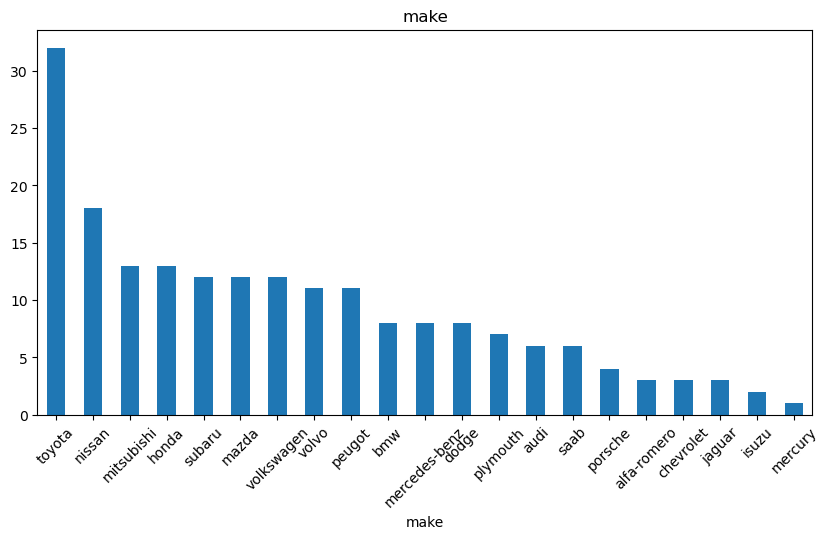

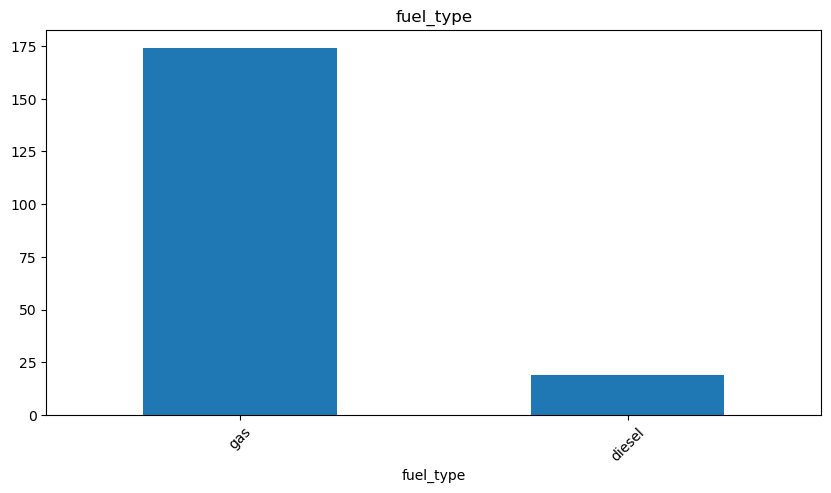

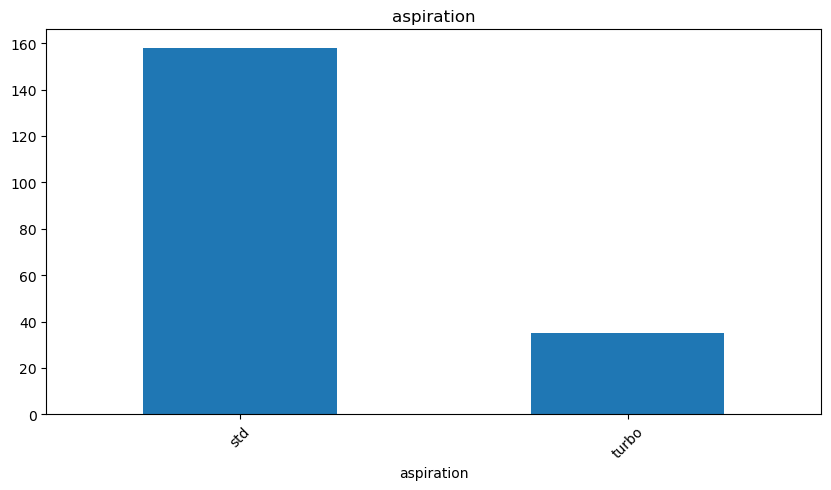

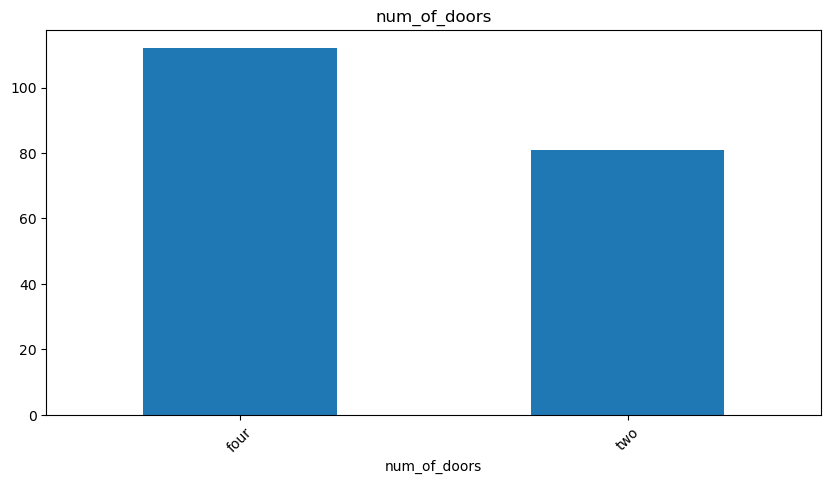

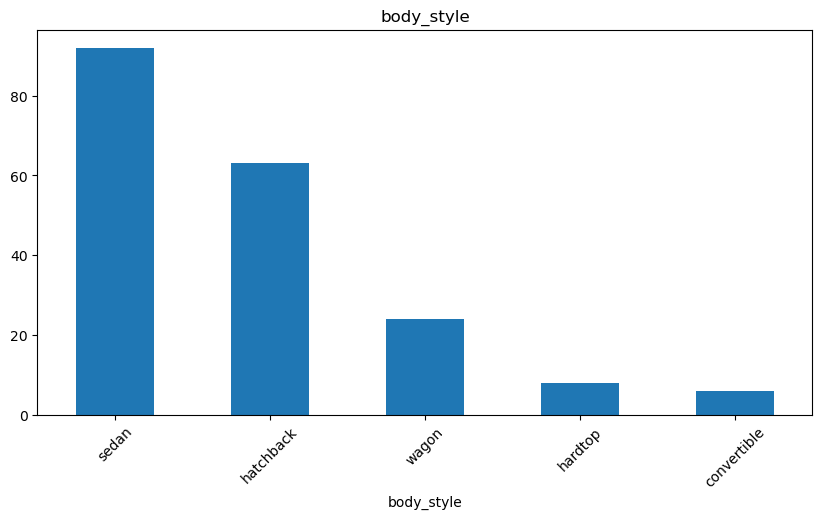

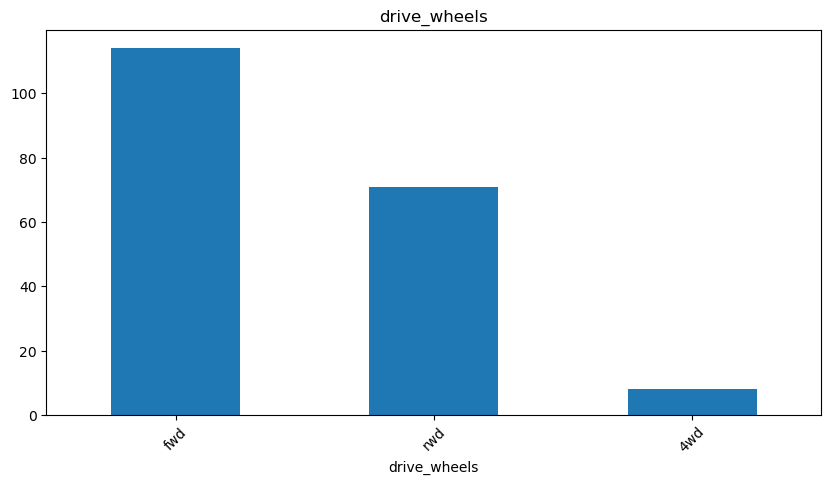

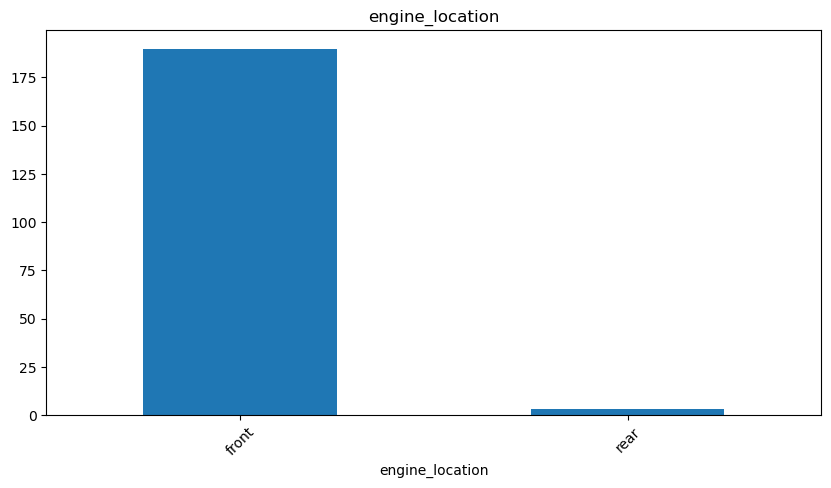

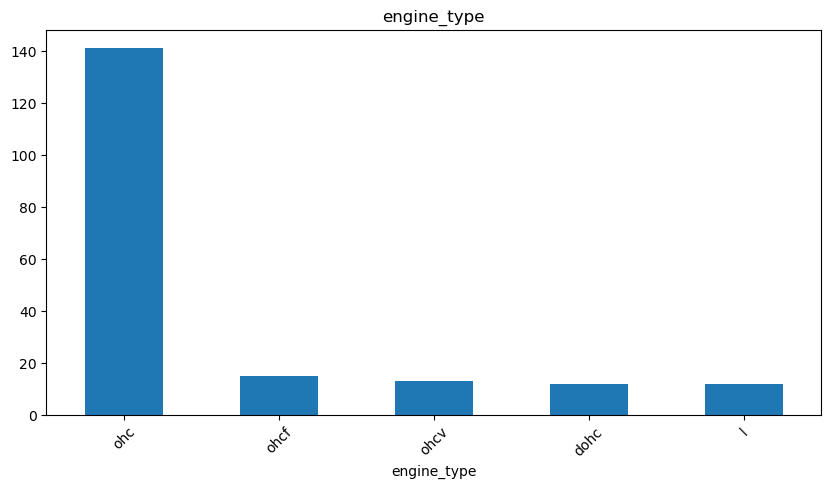

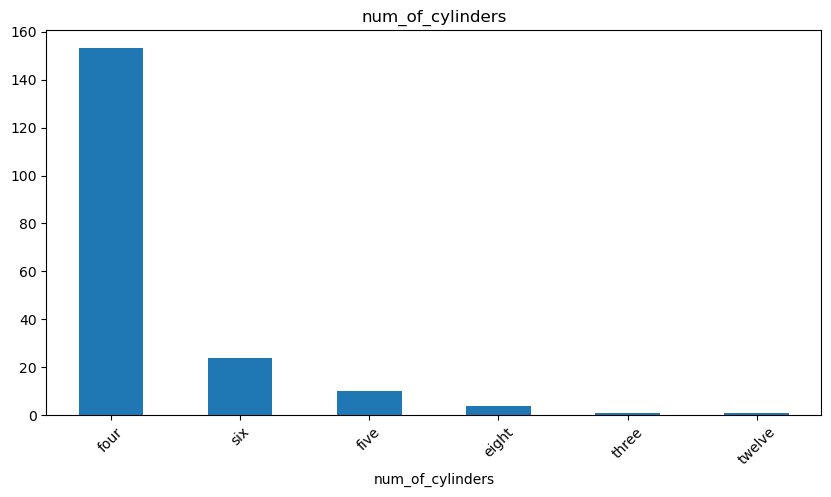

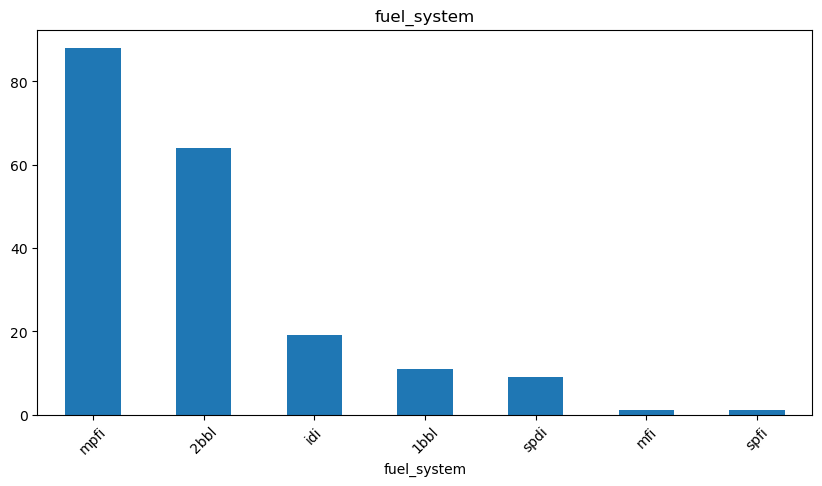

In [18]:
print('字串部分，以Bar顯示')
import matplotlib.pyplot as plt
print(list4)
for cols in list4:
  auto_price[cols].value_counts().plot(
      kind='bar',
      figsize=(10,5),
      title=cols,rot=45
  )
  plt.savefig('bar_'+cols+'.png')
  plt.show()

數值部分，以Hist顯示
['wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_size', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']


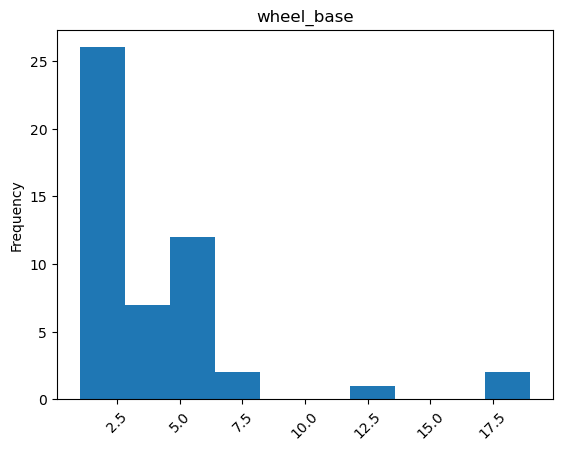

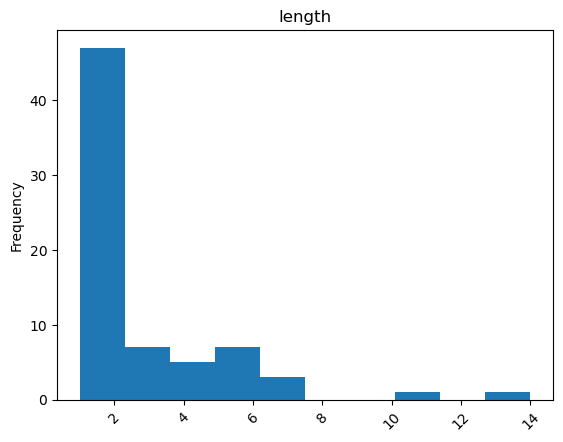

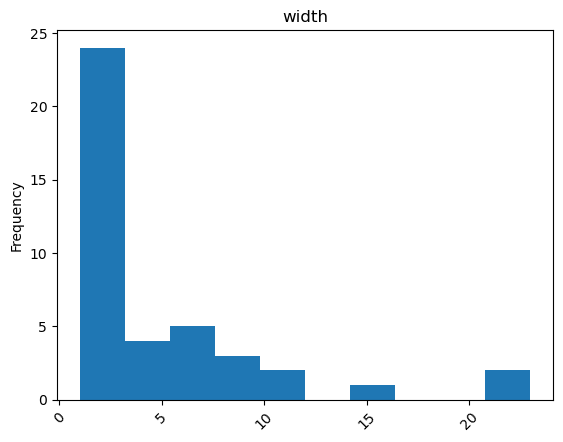

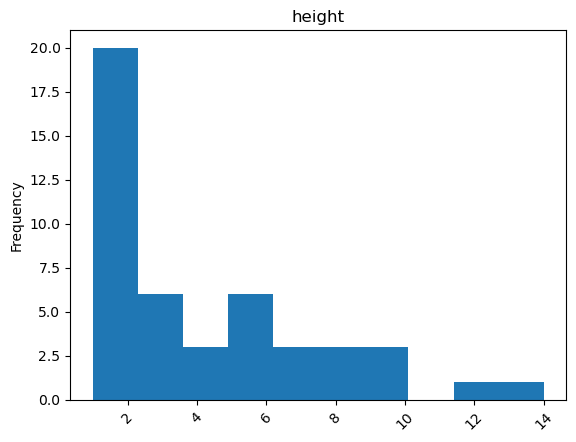

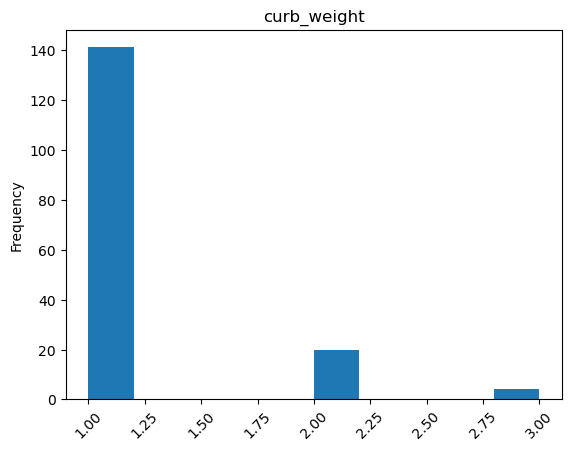

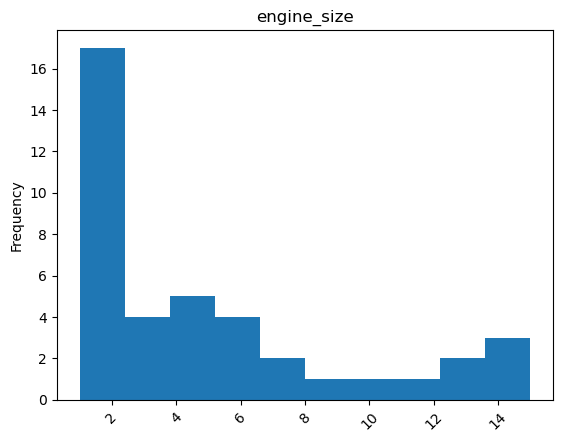

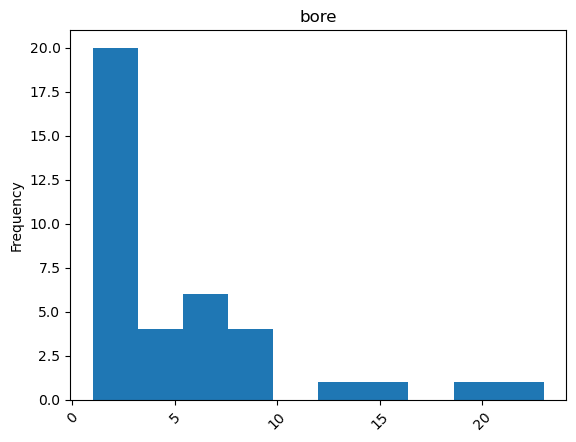

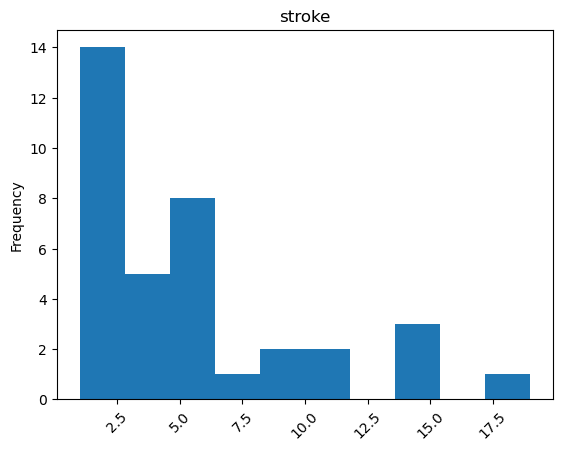

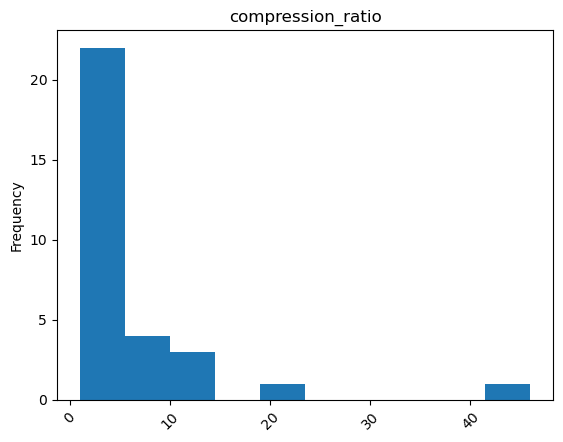

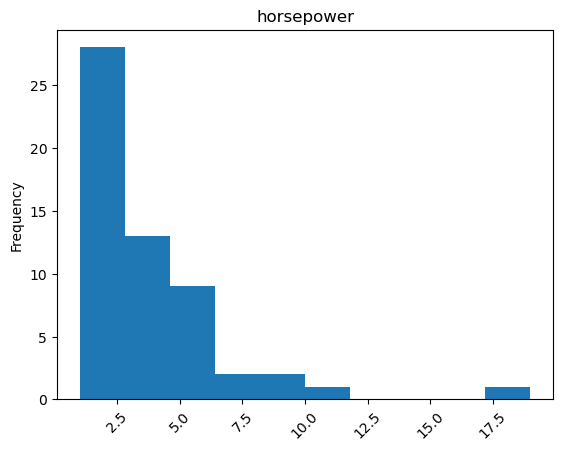

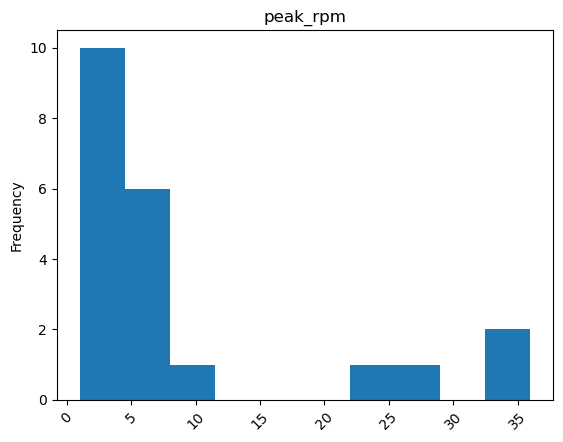

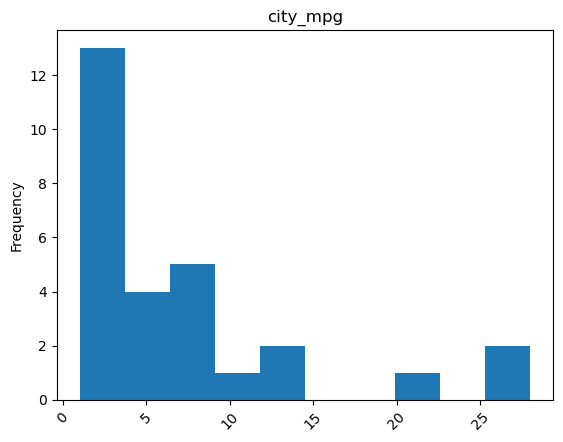

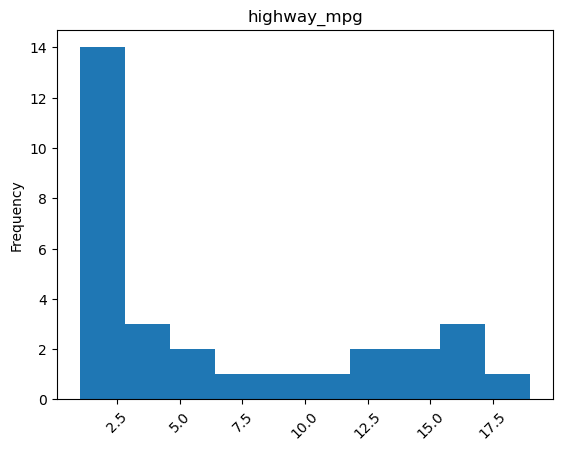

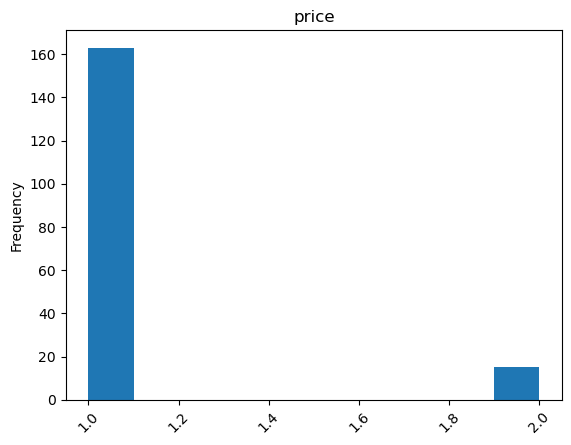

In [19]:
print('數值部分，以Hist顯示')
import matplotlib.pyplot as plt
print(list3)
for cols in list3:
  auto_price[cols].value_counts().plot(
      kind='hist',
      title=cols,rot=45
  )
  plt.savefig('hist_'+cols+'.png')
  plt.show()

數值部分，以scatter顯示
['wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_size', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']


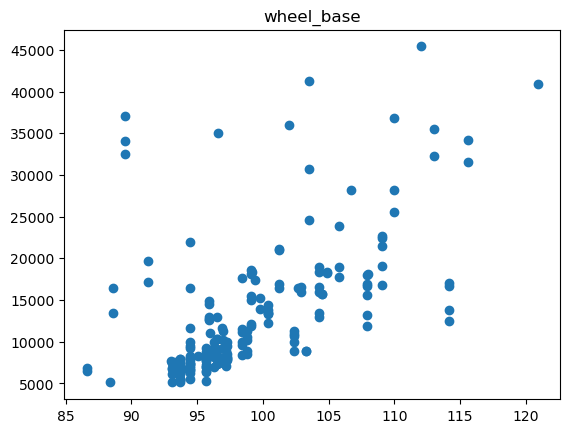

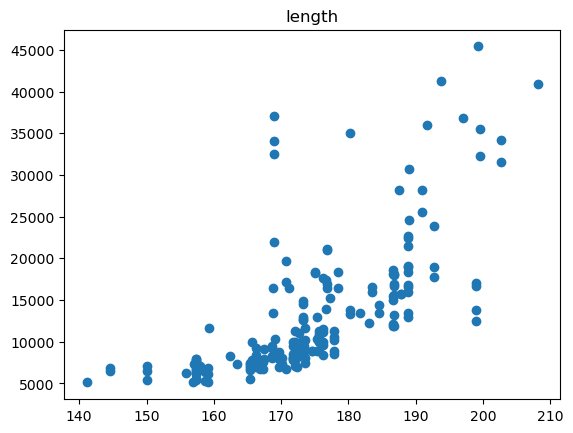

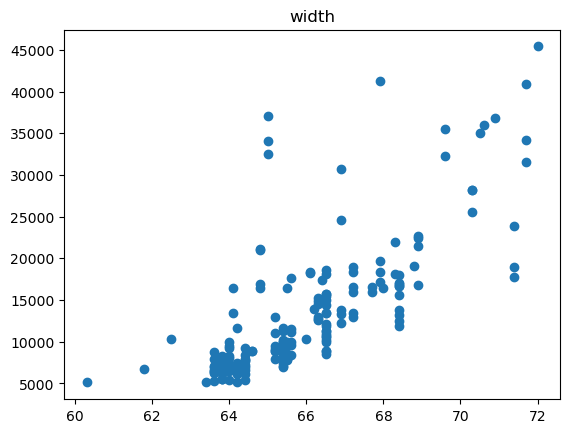

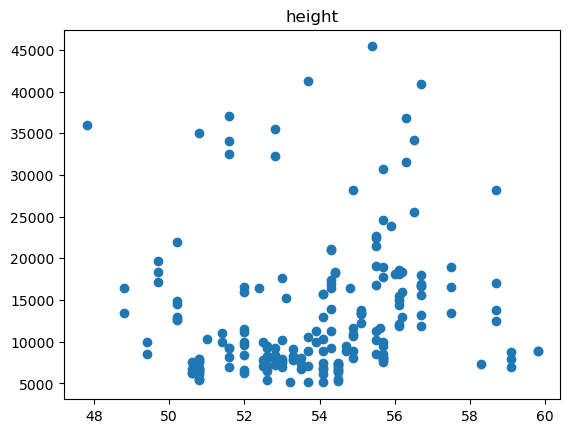

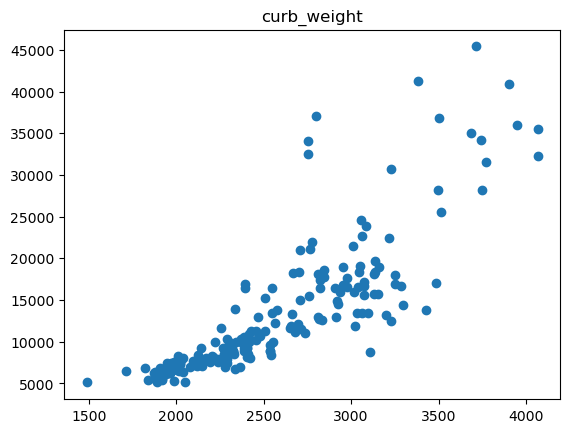

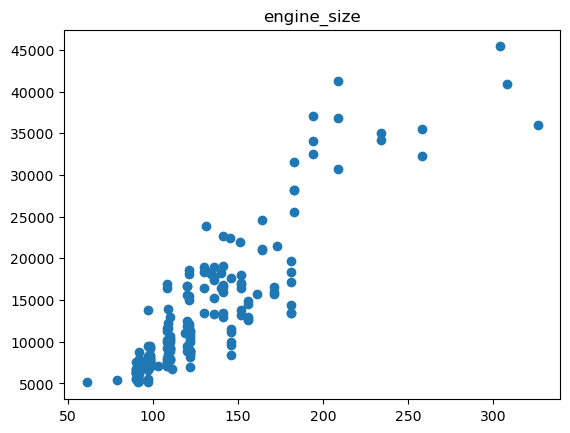

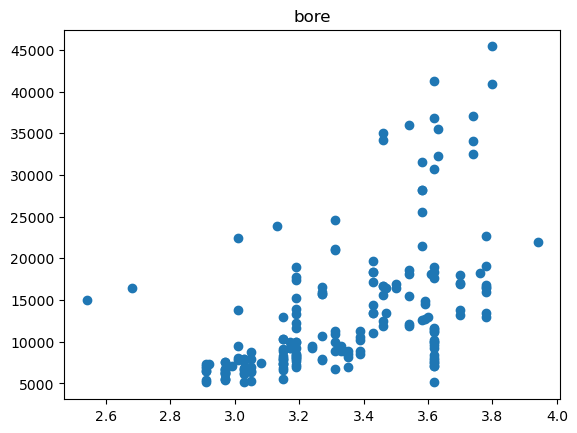

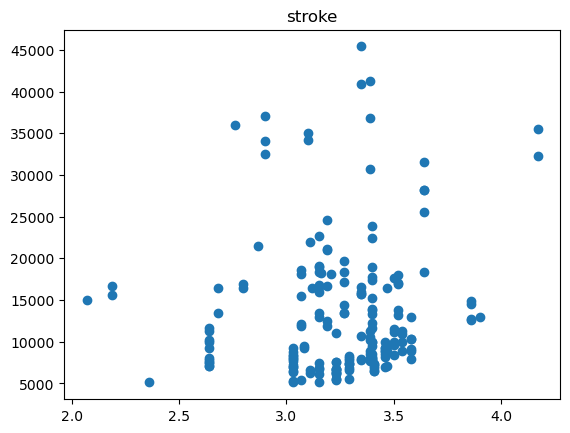

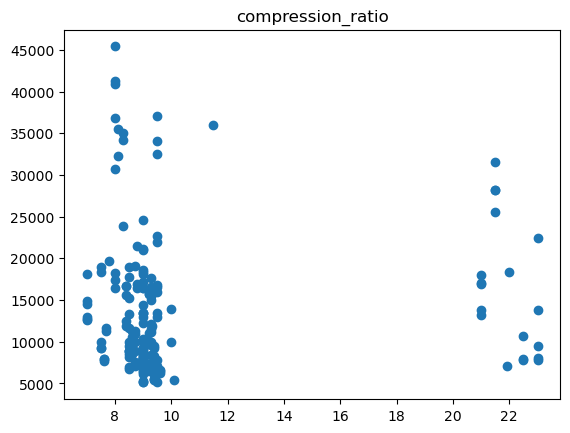

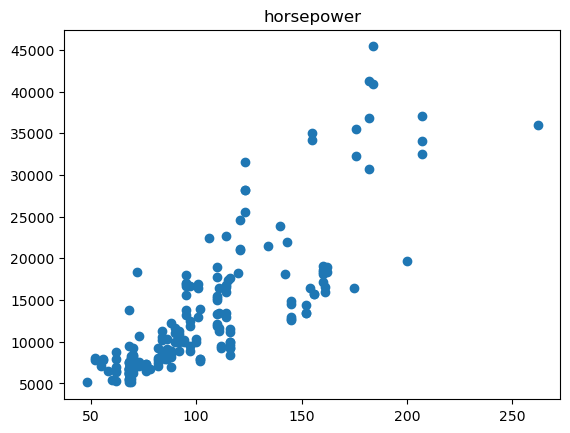

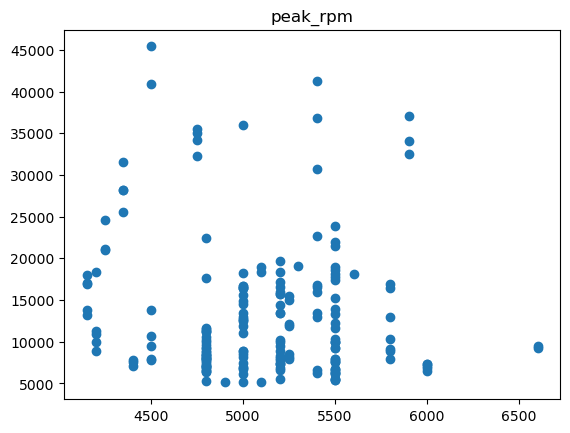

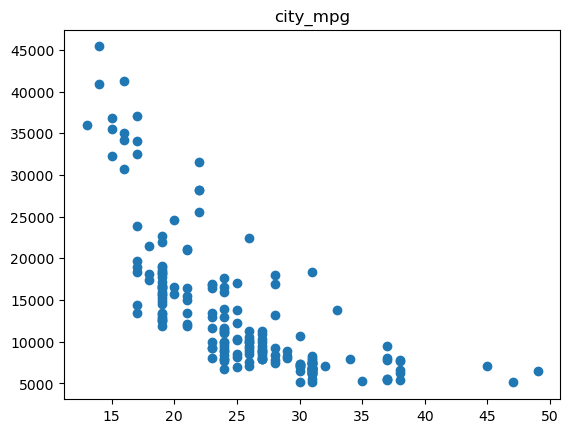

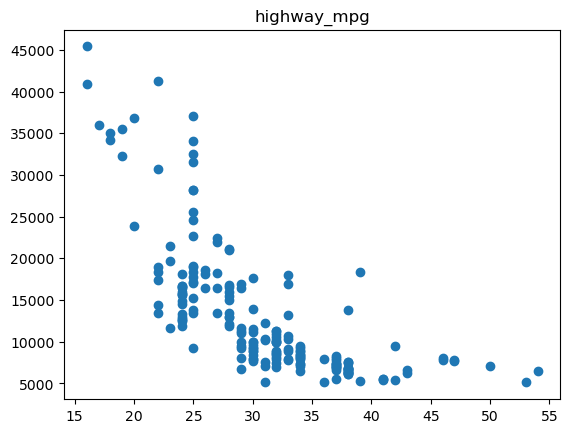

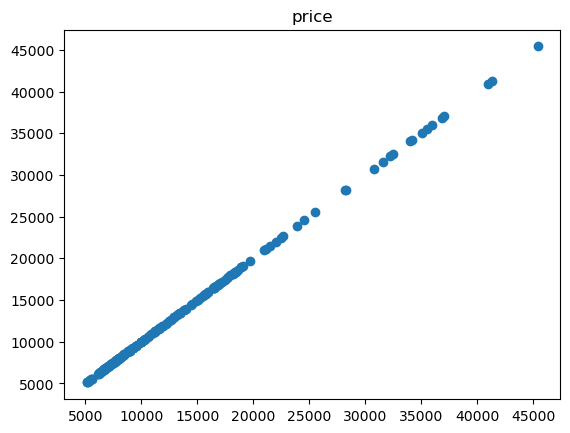

In [20]:
print('數值部分，以scatter顯示')
import matplotlib.pyplot as plt
print(list3)
for cols in list3:
  plt.title(cols)
  plt.scatter(auto_price[cols],auto_price['price'])
  plt.savefig('scatter_'+cols+'.png')
  plt.show()

數值部分，以boxplot顯示
['wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_size', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']


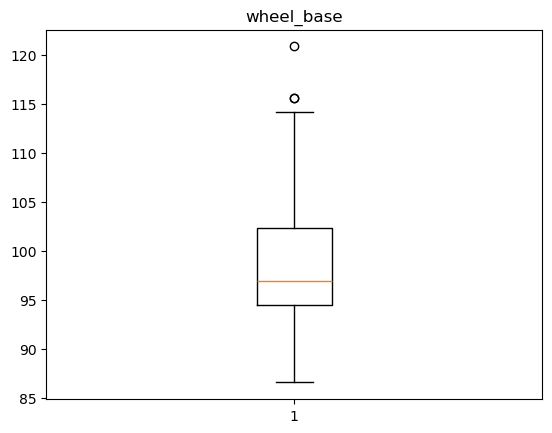

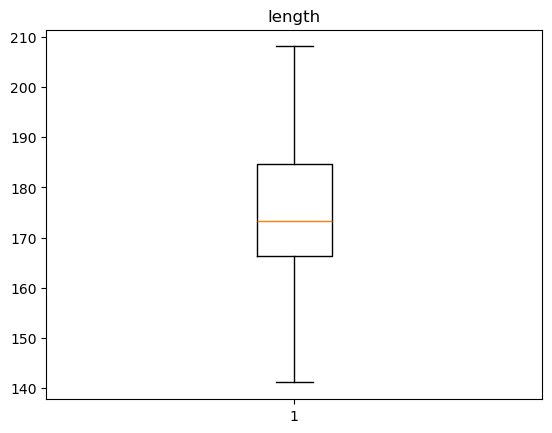

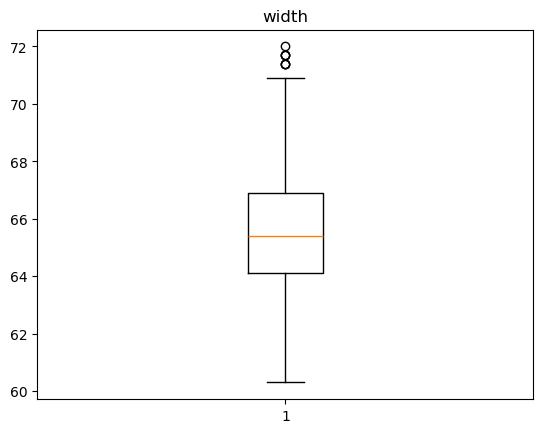

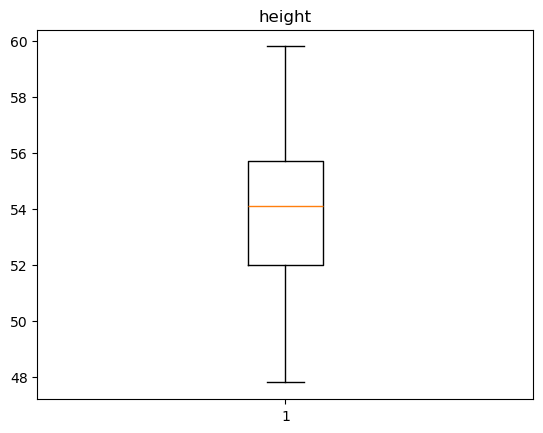

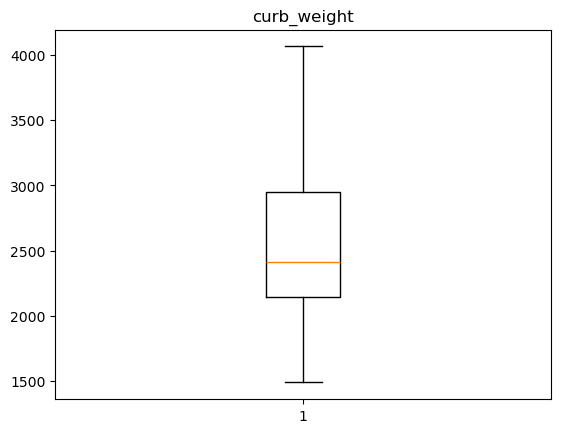

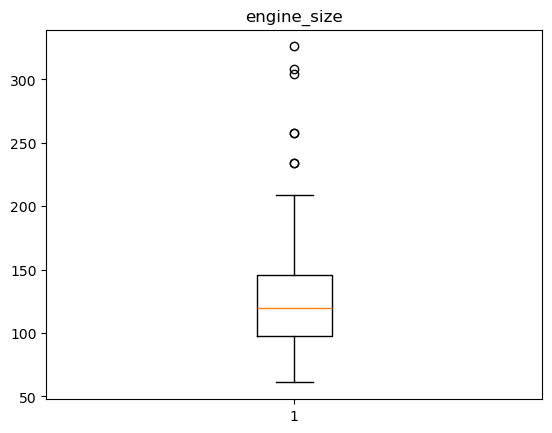

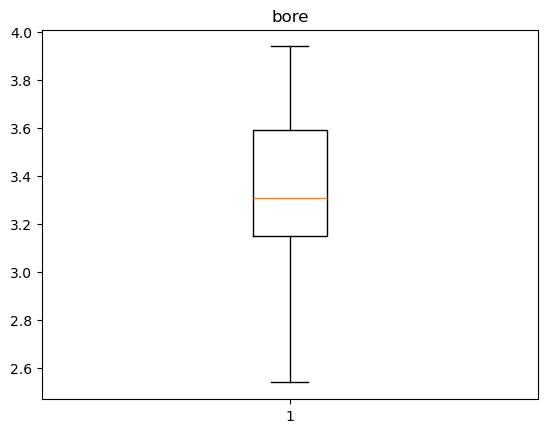

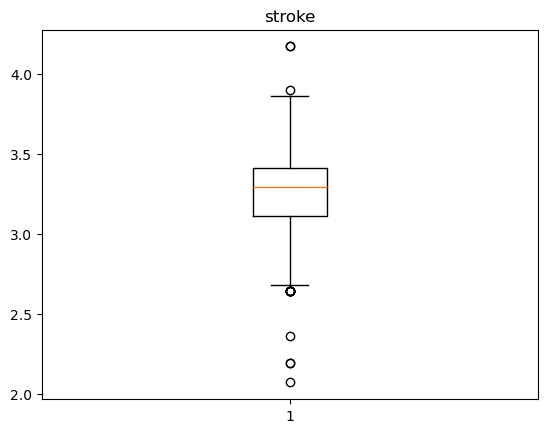

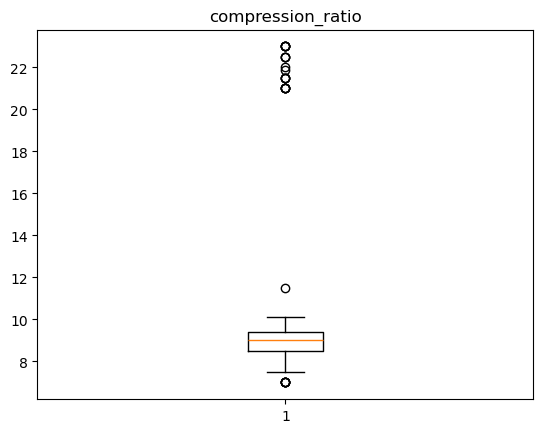

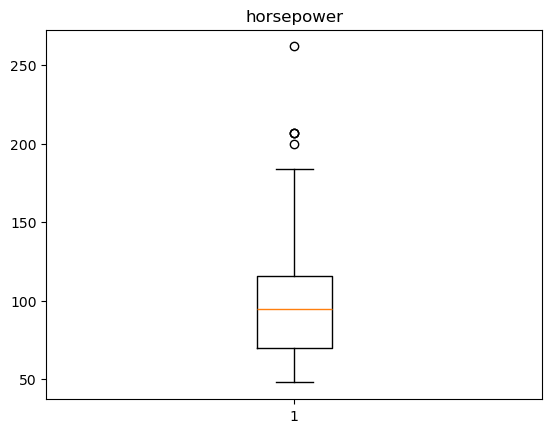

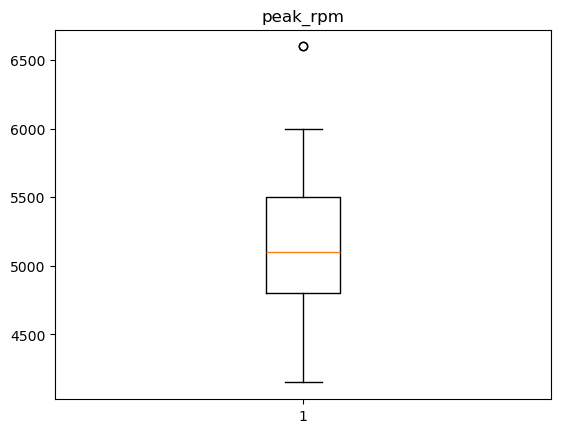

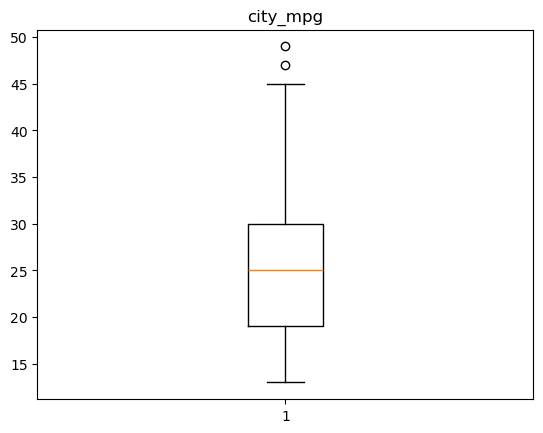

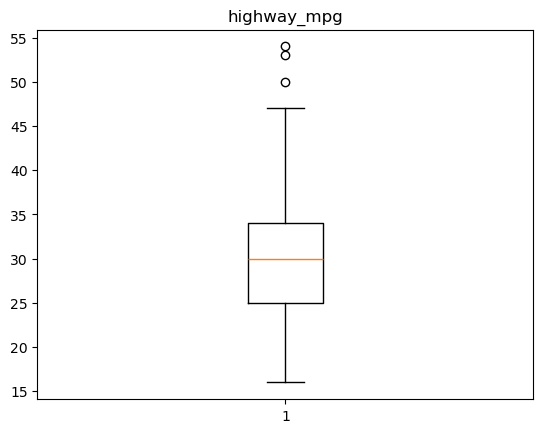

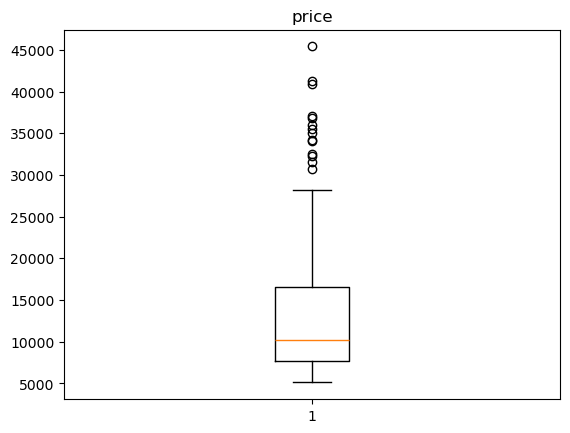

In [21]:
print('數值部分，以boxplot顯示')
import matplotlib.pyplot as plt
print(list3)
for cols in list3:
  plt.title(cols)
  plt.boxplot(auto_price[cols])
  plt.savefig('box_'+cols+'.png')
  plt.show()

                   wheel_base    length     width    height  curb_weight  \
wheel_base           1.000000  0.879307  0.818465  0.591239     0.782173   
length               0.879307  1.000000  0.857368  0.491050     0.882694   
width                0.818465  0.857368  1.000000  0.310640     0.867640   
height               0.591239  0.491050  0.310640  1.000000     0.305837   
curb_weight          0.782173  0.882694  0.867640  0.305837     1.000000   
engine_size          0.568375  0.686998  0.739903  0.026906     0.857188   
bore                 0.495957  0.606373  0.541633  0.182445     0.645070   
stroke               0.174225  0.121888  0.188733 -0.054338     0.175349   
compression_ratio    0.252234  0.156061  0.188631  0.253934     0.161030   
horsepower           0.377040  0.589650  0.621532 -0.081730     0.762154   
peak_rpm            -0.350823 -0.276144 -0.247612 -0.257334    -0.278528   
city_mpg            -0.504499 -0.702143 -0.657153 -0.111166    -0.777763   
highway_mpg 

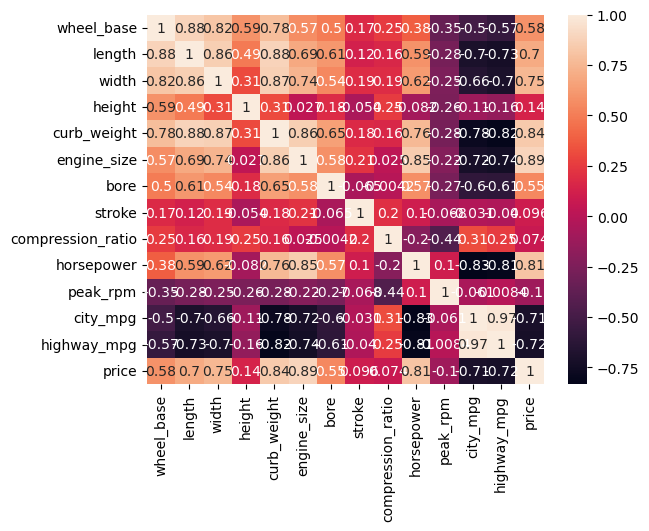

In [23]:
print(auto_price[list3].corr())
corr1=auto_price[list3].corr()
import seaborn as sns
sns.heatmap(corr1,annot=True)
plt.savefig('corr.png')
plt.show()
corr1.to_html('corr.html')

In [27]:
print('需要載入的套件在此設定')
print('2資料切割，採取隨機方式')
from sklearn.model_selection import train_test_split
print('3產生模型物件、迴歸與分類是不同')
from sklearn.linear_model import LinearRegression #線性迴歸模型
from sklearn.neighbors import KNeighborsRegressor #KNN迴歸模型
from sklearn.tree import DecisionTreeRegressor #決策樹迴歸模型
from sklearn.ensemble import RandomForestRegressor #隨機森林迴歸模型
from sklearn.svm import SVR #支援向量機迴歸模型
print('5與6、模型的儲存與載入，模型訓練的好可以儲存，不一定每次都要訓練後預估')
import joblib
print('8、模型進行評估，才知道模型訓練後好或不好')
print('評估於迴歸與分類是不同')
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error

需要載入的套件在此設定
2資料切割，採取隨機方式
3產生模型物件、迴歸與分類是不同
5與6、模型的儲存與載入，模型訓練的好可以儲存，不一定每次都要訓練後預估
8、模型進行評估，才知道模型訓練後好或不好
評估於迴歸與分類是不同
5與6、模型的儲存與載入，模型訓練的好可以儲存，不一定每次都要訓練後預估
8、模型進行評估，才知道模型訓練後好或不好
評估於迴歸與分類是不同


引用套件
線性迴歸：線性的直線的分布

KNN迴歸(也有分類)：
依據最近N個鄰居分布進行計算

決策樹迴歸(也有分類)：
依據條件進行是與否判斷
若沒有參數限制：
以100%進行訓練資料切割為目標。
訓練時100%正確，過擬合狀況，測試或預估時就不一定。

隨機森林迴歸(也有分類)：
以N個決策樹進行計算。
相對於一棵決策樹可能出錯風險，隨機森林較為安全。

支援向量機迴歸(也有分類)：
相對於前面屬於線條的訓練與預估，支援向量機迴歸屬於平面的資料分布。

In [ ]:
print('訓練資料的準備')
list5=list3.copy()
try:
  list5.remove('price')
  list5.remove('compression_ratio')
except:
  print('price、compression_ratio欄位不存在')
print(list5)
x=auto_price[list5]
y=auto_price['price']
list6=['width','curb_weight','engine_size','horsepower']

訓練資料的準備
['wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_size', 'bore', 'stroke', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg']


機器學習的迴歸模型處理流程：
1、X與y資料準備
2、資料切割
3、產生模型物件
4、模型物件進行訓練
5、儲存訓練後的模型
6、載入儲存後的模型檔案
7、模型物件進行預估
8、針對模型進行評估

In [ ]:
print('線性迴歸以list5為訓練資料的訓練與評估')
#1、X與y資料準備
x=auto_price[list5] #訓練資料
y=auto_price['price'] #訓練目標
#2、資料切割
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
#3、產生模型物件
model1=LinearRegression()
#4、模型物件進行訓練
model1.fit(x_train,y_train)
#5、儲存訓練後的模型
joblib.dump(model1,'model1.pkl')
#6、載入儲存後的模型檔案
model1=joblib.load('model1.pkl')
#7、模型物件進行預估
y_predict=model1.predict(x_test)
#8、模型進行評估
print('R2:',r2_score(y_test,y_predict))
print('MSE:',mean_squared_error(y_test,y_predict))
print('MAE:',mean_absolute_error(y_test,y_predict))
print('MedAE:',median_absolute_error(y_test,y_predict))


線性迴歸以list5為訓練資料的訓練與評估
R2: 0.8337711173799063
MSE: 14899415.804809762
MAE: 2709.337346548209
MedAE: 2071.9416676531328


In [30]:
print('線性迴歸以list6為訓練資料的訓練與評估')
#1、X與y資料準備
x=auto_price[list6]
y=auto_price['price']
#2、資料切割
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
#3、產生模型物件
model1=LinearRegression()
#4、模型物件進行訓練
model1.fit(x_train,y_train)
#5、儲存訓練後的模型
joblib.dump(model1,'model1.pkl')
#6、載入儲存後的模型檔案
model1=joblib.load('model1.pkl')
#7、模型物件進行預估
y_predict=model1.predict(x_test)
#8、模型進行評估
print('R2:',r2_score(y_test,y_predict))
print('MSE:',mean_squared_error(y_test,y_predict))
print('MAE:',mean_absolute_error(y_test,y_predict))
print('MedAE:',median_absolute_error(y_test,y_predict))


線性迴歸以list6為訓練資料的訓練與評估
R2: 0.8498206606907177
MSE: 10872822.56284432
MAE: 2398.175946546967
MedAE: 1628.5075707723881


資料切割:
test_size代表
測試資料比例
0.2或0.3較為合適
切割後產生四組資料
隨機方式進行切割
x_train訓練資料
x_test測試資料
y_train訓練目標
y_test測試目標

產生模型物件:
每一種模型的( )內
是否有參數
參數的項目
都會不同
模型進行訓練
都是使用fit

模型儲存與載入:
副檔名不一定是pkl
joblib.dump代表儲存
joblib.load代表載入
模型載入後就
可以預估，不需要
再訓練。
模型進行預估
預估的成果與真實
資料可以進行評估